<a href="https://colab.research.google.com/github/Isuru-Akalanka/Bank-Loan-ML/blob/main/Deep%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import joblib

In [ ]:
train_df = pd.read_csv('train.csv', encoding='utf-8')
test_df = pd.read_csv('test.csv', encoding='utf-8')

In [ ]:
print(train_df.shape)
print(test_df.shape)

(58645, 13)
(39098, 12)


In [ ]:
print(train_df.info())
print(train_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [ ]:
print(test_df.info())
print(test_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.6+ MB
None
                 id    per

In [ ]:

from sklearn.preprocessing import LabelEncoder
import pandas as pd
import joblib

# Load your train and test data
train_df = pd.read_csv('train.csv', encoding='utf-8')
test_df = pd.read_csv('test.csv', encoding='utf-8')

# Identify the categorical columns
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Initialize a dictionary to store the label encoders
label_encoders = {}

# Encode categorical columns for both train and test data
for col in categorical_columns:
    label_encoder = LabelEncoder()
    # Fit the label encoder on the training data and transform it
    train_df[col] = label_encoder.fit_transform(train_df[col].astype(str))
    # Use the fitted encoder to transform the test data
    test_df[col] = label_encoder.transform(test_df[col].astype(str))

    # Save the label encoder to the dictionary
    label_encoders[col] = label_encoder

# Optionally: Save the encoded data back to CSV
train_df.to_csv('train_encoded.csv', index=False)
test_df.to_csv('test_encoded.csv', index=False)

# Save the label encoders to disk
joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']

In [ ]:
train_df.head(5)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,3,0.0,1,1,6000,11.49,0.17,0,14,0
1,1,22,56000,2,6.0,3,2,4000,13.35,0.07,0,2,0
2,2,29,28800,2,8.0,4,0,6000,8.90,0.21,0,10,0
3,3,30,70000,3,14.0,5,1,12000,11.11,0.17,0,5,0
4,4,22,60000,3,2.0,3,0,6000,6.92,0.10,0,3,0


In [ ]:
test_df.head(5)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,3,3.0,2,5,25000,15.76,0.36,0,2
1,58646,26,96000,0,6.0,4,2,10000,12.68,0.10,1,4
2,58647,26,30000,3,5.0,5,4,4000,17.19,0.13,1,2
3,58648,33,50000,3,4.0,0,0,7000,8.90,0.14,0,7
4,58649,26,102000,0,8.0,2,3,15000,16.32,0.15,1,4


In [ ]:
common_columns = set(train_df.columns) & set(test_df.columns)
uncommon_columns = set(train_df.columns) ^ set(test_df.columns)  # XOR operation to get differences

print(f"Common Columns: {common_columns}\n")
print(f"Uncommon Columns: {uncommon_columns}\n")

Common Columns: {'loan_int_rate', 'person_income', 'id', 'loan_percent_income', 'cb_person_default_on_file', 'person_emp_length', 'person_age', 'loan_intent', 'person_home_ownership', 'cb_person_cred_hist_length', 'loan_grade', 'loan_amnt'}

Uncommon Columns: {'loan_status'}



In [ ]:
train_df.loan_status.value_counts()

,count
loan_status,
0,50295
1,8350


In [ ]:
# prompt: # Count the occurrences of each class in loan_status

loan_status_counts =train_df['loan_status'].value_counts()


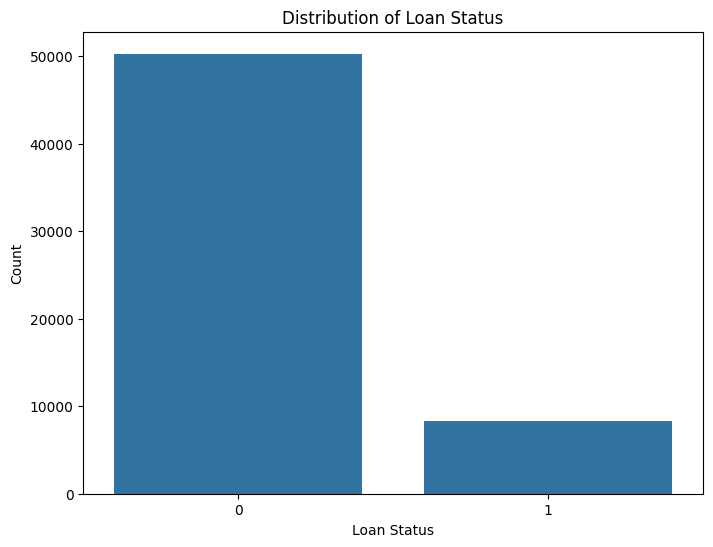

In [ ]:
# prompt: #plot the distribution

plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=train_df)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


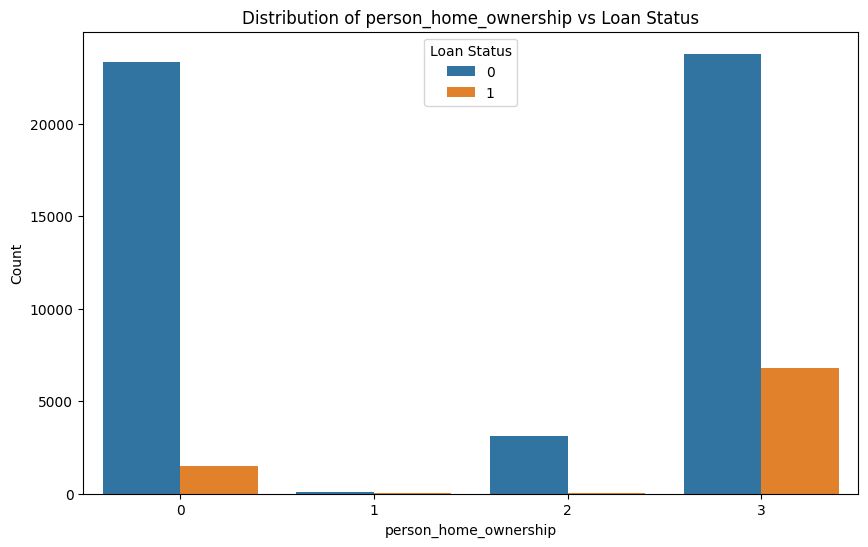

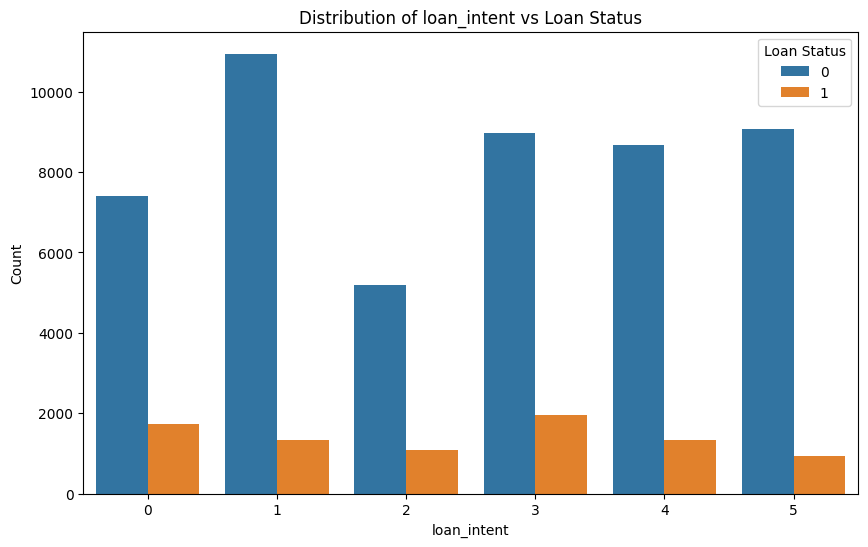

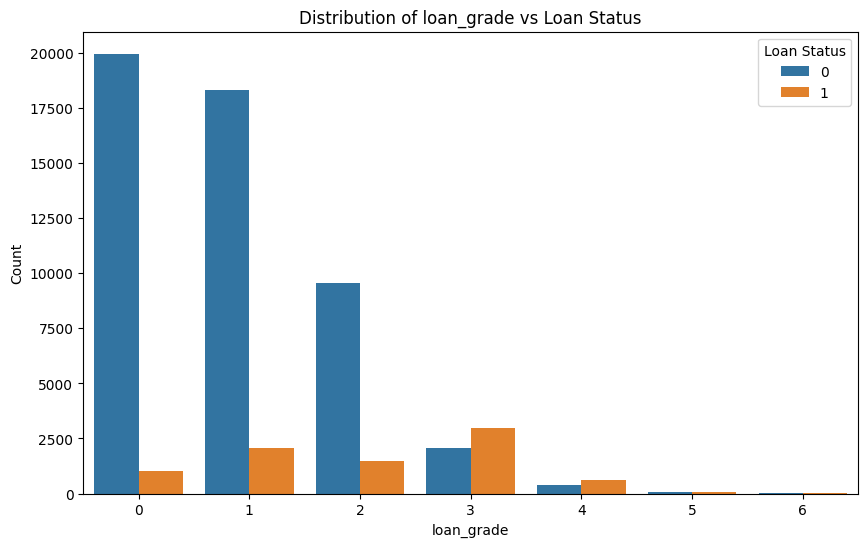

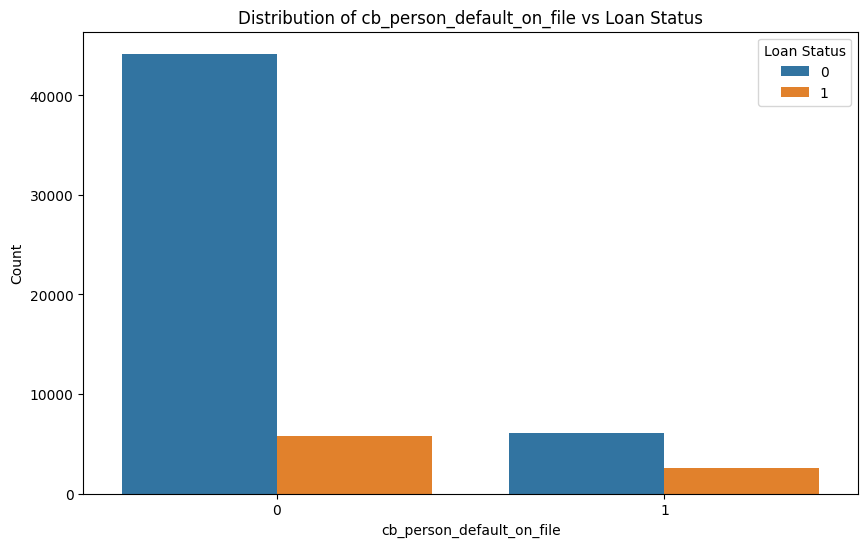

In [ ]:
# prompt: Plotting the categorical data with respect to the loan_status, which is our target variable

# Plotting categorical features against loan_status
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='loan_status', data=train_df)
    plt.title(f'Distribution of {col} vs Loan Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
    plt.legend(title='Loan Status')
    plt.show()


In [ ]:
# get differences

common_columns = set(train_df.columns) & set(test_df.columns)
uncommon_columns = set(train_df.columns) ^ set(test_df.columns)

In [ ]:
print(f"Common Columns: {common_columns}\n")
print(f"Uncommon Columns: {uncommon_columns}\n")

Common Columns: {'loan_int_rate', 'person_income', 'id', 'loan_percent_income', 'cb_person_default_on_file', 'person_emp_length', 'person_age', 'loan_intent', 'person_home_ownership', 'cb_person_cred_hist_length', 'loan_grade', 'loan_amnt'}

Uncommon Columns: {'loan_status'}



In [ ]:
# prompt: check missing values

# Check missing values in training data
print(train_df.isnull().sum())

# Check missing values in testing data
print(test_df.isnull().sum())


id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64
id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [ ]:
# prompt: Count the occurrences of each class in loan_status

# Count the occurrences of each class in 'loan_status'
loan_status_counts = train_df['loan_status'].value_counts()
loan_status_counts


,count
loan_status,
0,50295
1,8350


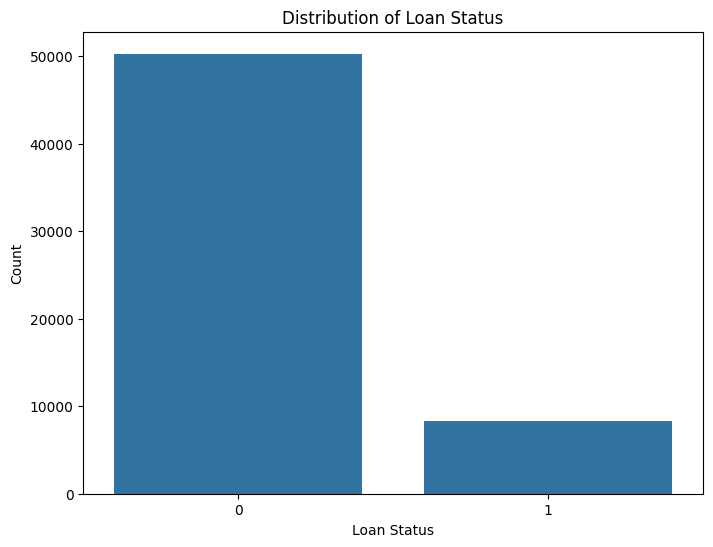

In [ ]:
# prompt: Plot the distribution

plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=train_df)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


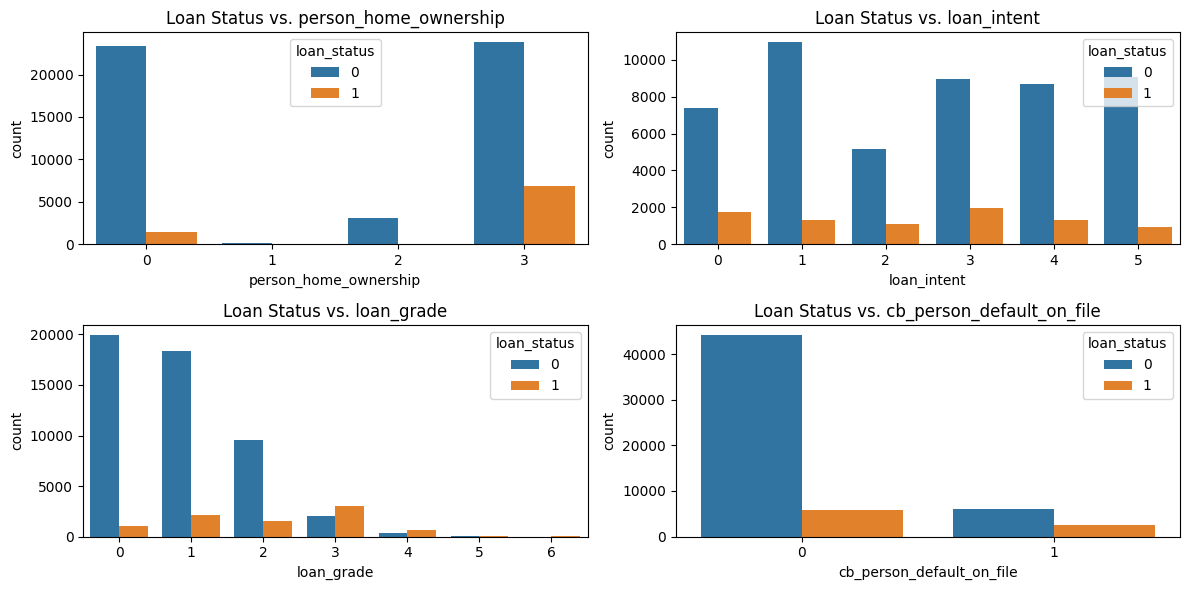

In [ ]:
# prompt: # Plotting the categorical data with respect to the loan_status, which is our target variable

# Plotting the categorical data with respect to the loan_status, which is our target variable
plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_columns):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=col, hue='loan_status', data=train_df)
    plt.title(f'Loan Status vs. {col}')
    plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()


In [ ]:
# Install the necessary packages
!pip install pandas seaborn matplotlib scikit-learn joblib


<ipython-input-29-c80470e09493>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=train_df.duplicated(), data=train_df, palette='viridis') # added a pallete for better aesthetics


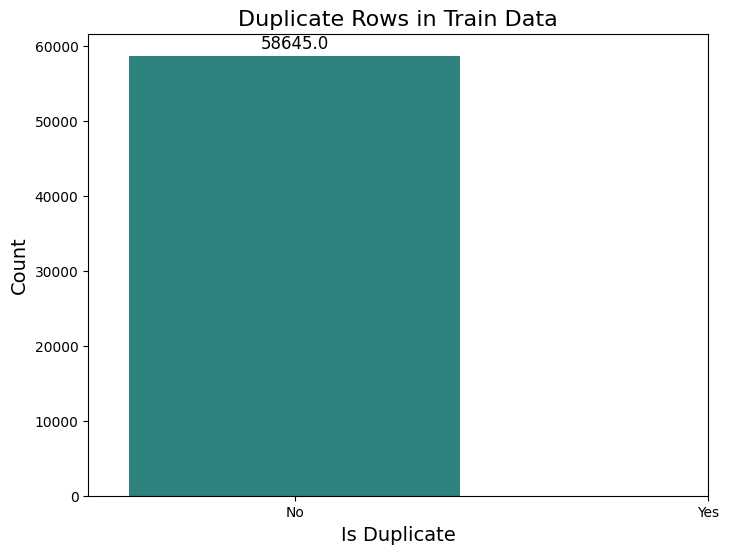

In [ ]:
# Plotting duplicate rows in train_df
plt.figure(figsize=(8, 6)) # Increased figure size for better visibility
ax = sns.countplot(x=train_df.duplicated(), data=train_df, palette='viridis') # added a pallete for better aesthetics
plt.title('Duplicate Rows in Train Data', fontsize=16) # Increased font size
plt.xlabel('Is Duplicate', fontsize=14) # Increased font size
plt.ylabel('Count', fontsize=14) # Increased font size
plt.xticks([0, 1], ['No', 'Yes']) # Changed the x ticks to be easier to understand

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()



<ipython-input-30-be90bb40ff19>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=test_df.duplicated(), data=test_df, palette='viridis') # added a pallete for better aesthetics


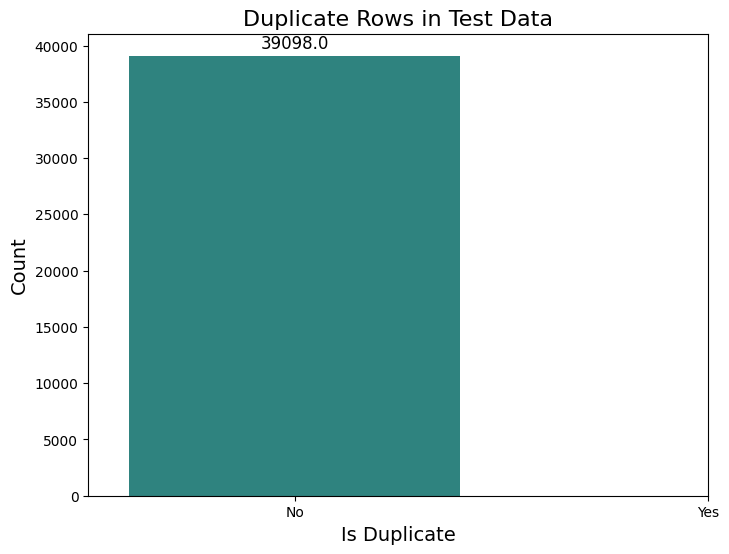

In [ ]:
# Plotting duplicate rows in test_df
plt.figure(figsize=(8, 6)) # Increased figure size for better visibility
ax = sns.countplot(x=test_df.duplicated(), data=test_df, palette='viridis') # added a pallete for better aesthetics
plt.title('Duplicate Rows in Test Data', fontsize=16) # Increased font size
plt.xlabel('Is Duplicate', fontsize=14) # Increased font size
plt.ylabel('Count', fontsize=14) # Increased font size
plt.xticks([0, 1], ['No', 'Yes']) # Changed the x ticks to be easier to understand

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


In [ ]:
train_df['person_home_ownership'].unique()


array([3, 2, 0, 1])

In [ ]:
train_df['loan_intent'].unique()

array([1, 3, 4, 5, 0, 2])

In [ ]:
train_df['loan_grade'].unique()

array([1, 2, 0, 3, 4, 5, 6])

In [ ]:
train_df['cb_person_default_on_file'].unique()

array([0, 1])

In [ ]:
df = train_df.copy()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
# Define features (X) and target (y)
X = df.drop(columns=["loan_status"]) # All columns except 'loan_status' are features
y = df["loan_status"]  # 'loan_status' is the target variable

# Identify categorical features
categorical_features = ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]

# Encode categorical features
encoder = OrdinalEncoder()
X[categorical_features] = encoder.fit_transform(X[categorical_features])



In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import mutual_info_classif
# Compute Mutual Information
mutual_info = mutual_info_classif(X, y, random_state=42)

# Convert to Pandas Series
mutual_info = pd.Series(mutual_info, index=X.columns)

# Sort values in descending order
mutual_info = mutual_info.sort_values(ascending=False)

# Display results
mutual_info_df = pd.DataFrame(mutual_info, columns=['Mutual Information'])
print(mutual_info_df)

<ipython-input-30-fa7ef6cb2bc5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mutual_info_df.index, y='Mutual Information', data=mutual_info_df, palette="RdBu")


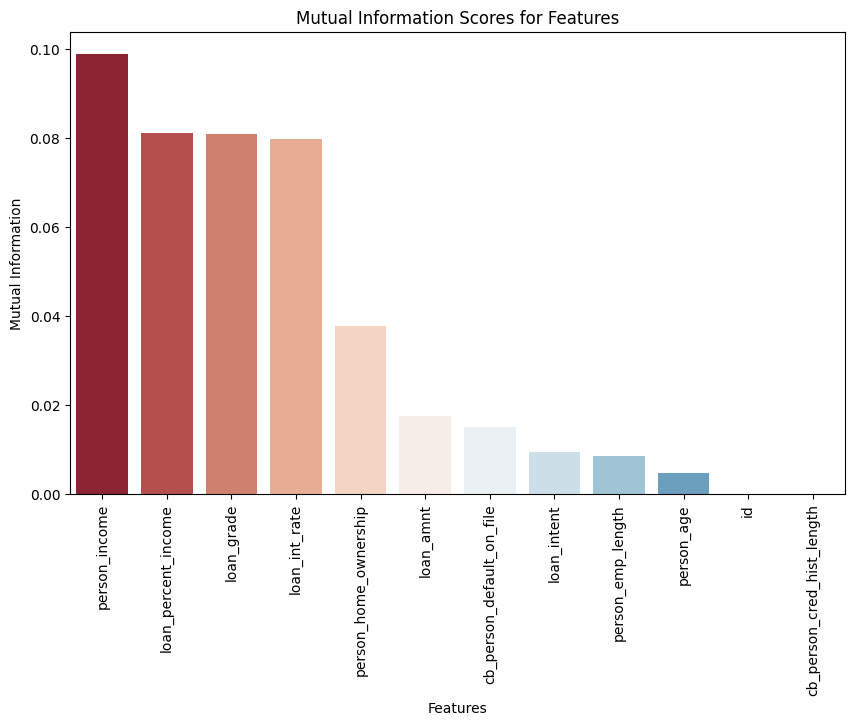

In [ ]:
# prompt: print barplot to show Mutual information score

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=mutual_info_df.index, y='Mutual Information', data=mutual_info_df, palette="RdBu")
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Mutual Information')
plt.title('Mutual Information Scores for Features')
plt.show()


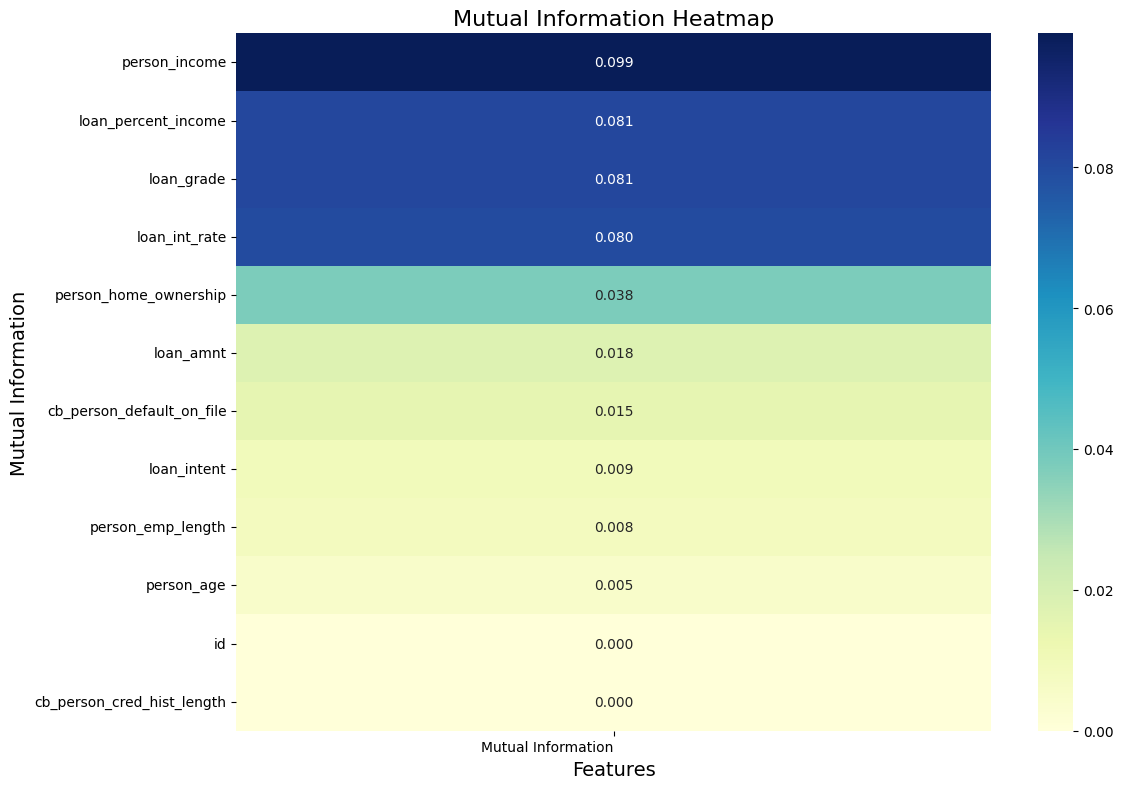

In [ ]:
# prompt: create heatmap to mutual information score

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'mutual_info_df' is already created as in the previous code

plt.figure(figsize=(12, 8))  # Adjust figure size for better visualization
sns.heatmap(mutual_info_df, annot=True, cmap="YlGnBu", fmt=".3f") # Added annotation, changed colormap
plt.title('Mutual Information Heatmap', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Mutual Information', fontsize=14)
plt.xticks(rotation=0, ha='right') # Rotate x-axis labels for readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


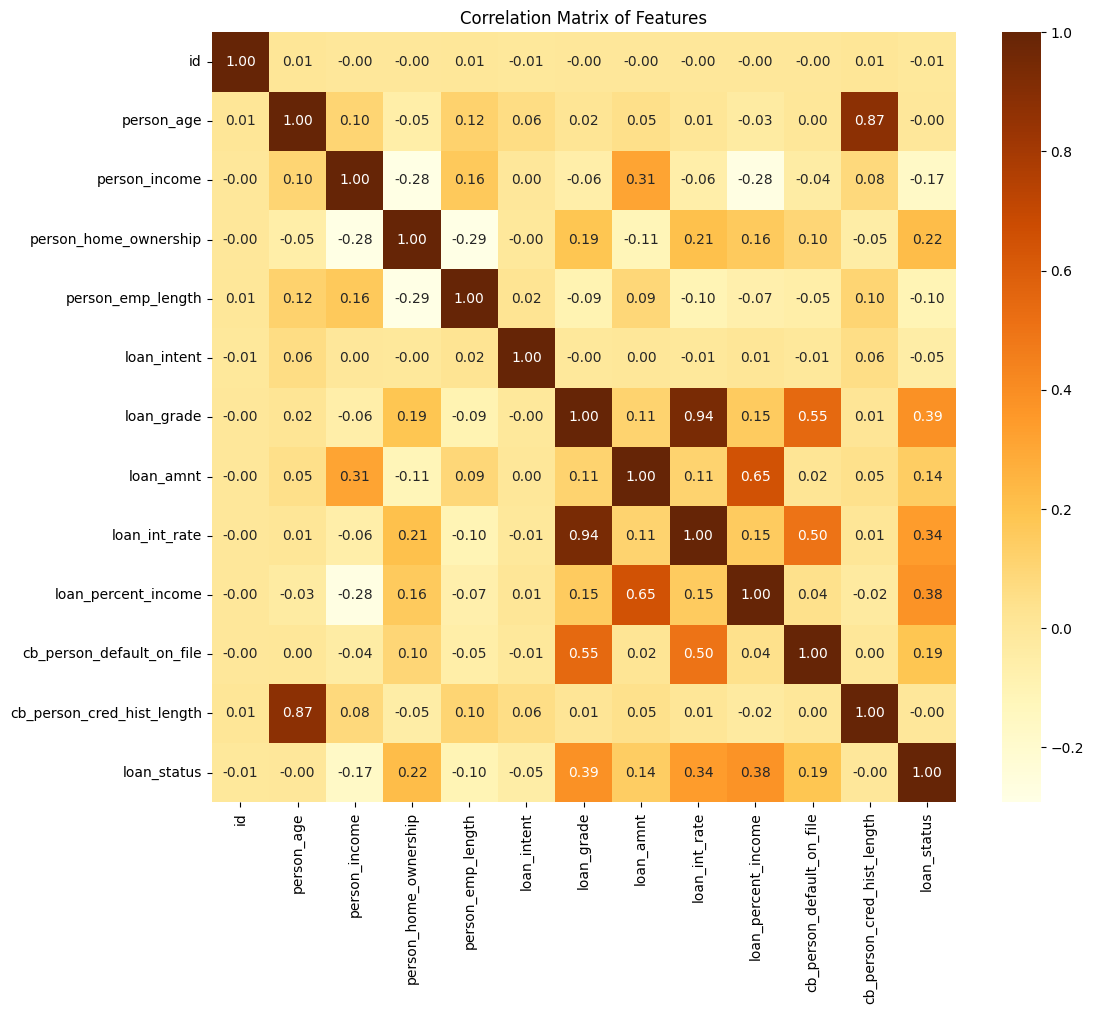

In [ ]:
# prompt: do correlation analysis

# Assuming 'train_df' is already loaded and preprocessed as in your provided code.

# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40) # Splitting 80% for training, 20% for testing

#Standardize the numerical data
scaler = StandardScaler()
numerical_cols = X_train.select_dtypes(include=np.number).columns
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [ ]:
# prompt: def prepare function Applies Label Encoding to a categorical column in train and test DataFrames and return train_df and test_df

def prepare(train_df, test_df, categorical_features):
    # Encode categorical columns for both train and test data
    for col in categorical_features:
        label_encoder = LabelEncoder()
        # Fit the label encoder on the training data and transform it
        train_df[col] = label_encoder.fit_transform(train_df[col])
        # Use the fitted encoder to transform the test data
        test_df[col] = label_encoder.transform(test_df[col])

        # Save the label encoder to the dictionary
        #label_encoders[col] = label_encoder

    return train_df, test_df


In [ ]:
# Identify the categorical columns
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

train_df, test_df = prepare(train_df, test_df, categorical_features)

features = train_df.drop(["loan_status"], axis=1)
label = train_df["loan_status"]
features.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0,37,35000,3,0.0,1,1,6000,11.49,0.17,0,14
1,1,22,56000,2,6.0,3,2,4000,13.35,0.07,0,2
2,2,29,28800,2,8.0,4,0,6000,8.90,0.21,0,10
3,3,30,70000,3,14.0,5,1,12000,11.11,0.17,0,5
4,4,22,60000,3,2.0,3,0,6000,6.92,0.10,0,3


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=40)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42) # Splitting 80% for training, 20% for testing


# **Initial Attempt using 3 models**

In [ ]:
# Initialize classifiers
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, kernel='rbf', C=1)
}


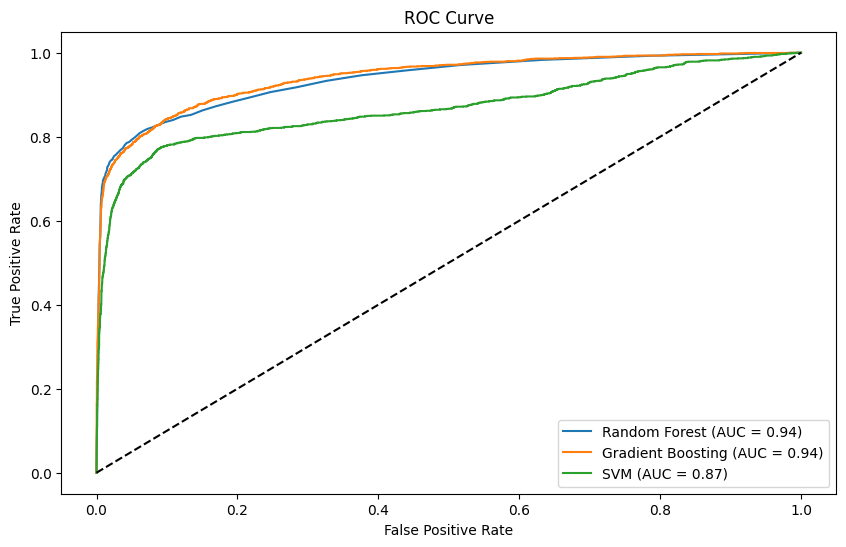

In [ ]:
# Train and evaluate models
results = []
plt.figure(figsize=(10, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else np.zeros(len(y_test))

    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    results.append([name, acc, roc_auc])

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

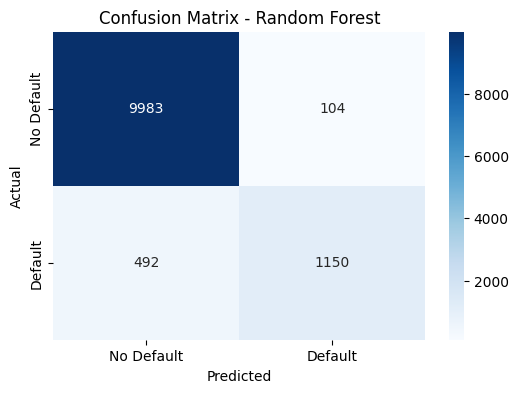

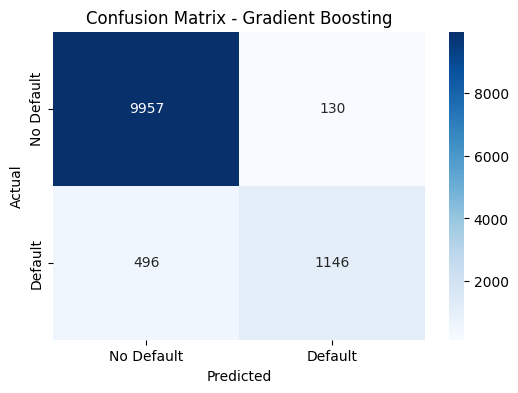

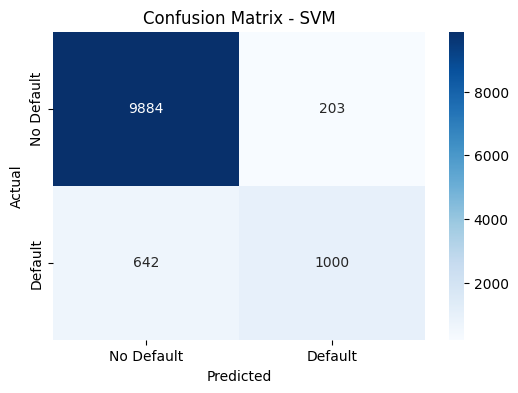

In [ ]:
# Confusion Matrix Visualization
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Default", "Default"], yticklabels=["No Default", "Default"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

<ipython-input-24-850d30afe3ec>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="ROC-AUC", data=performance_df, palette="coolwarm")


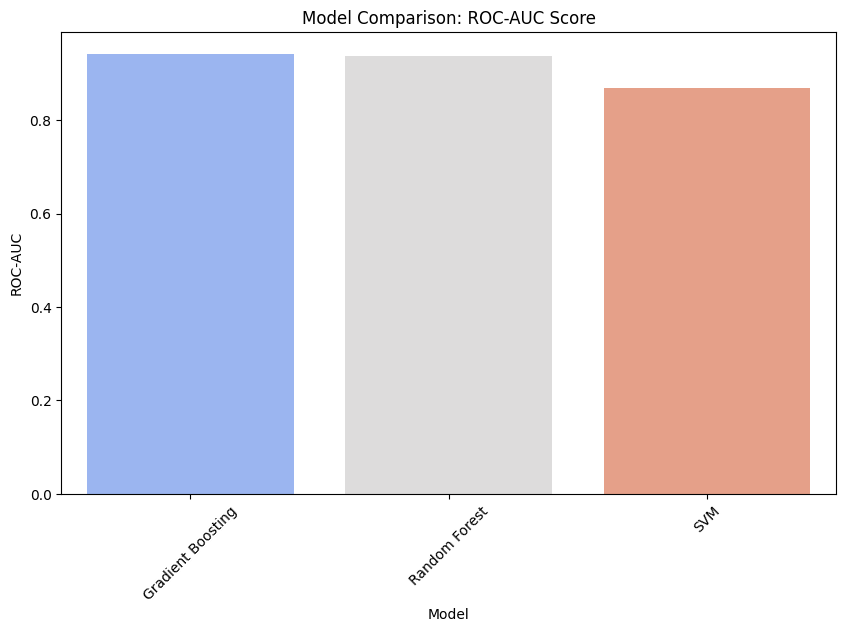

In [ ]:
# Convert results to a DataFrame
performance_df = pd.DataFrame(results, columns=["Model", "Accuracy", "ROC-AUC"])
performance_df = performance_df.sort_values(by="ROC-AUC", ascending=False)

# Performance Comparison Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="ROC-AUC", data=performance_df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Model Comparison: ROC-AUC Score")
plt.show()


<ipython-input-25-fc6f13b1687f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")


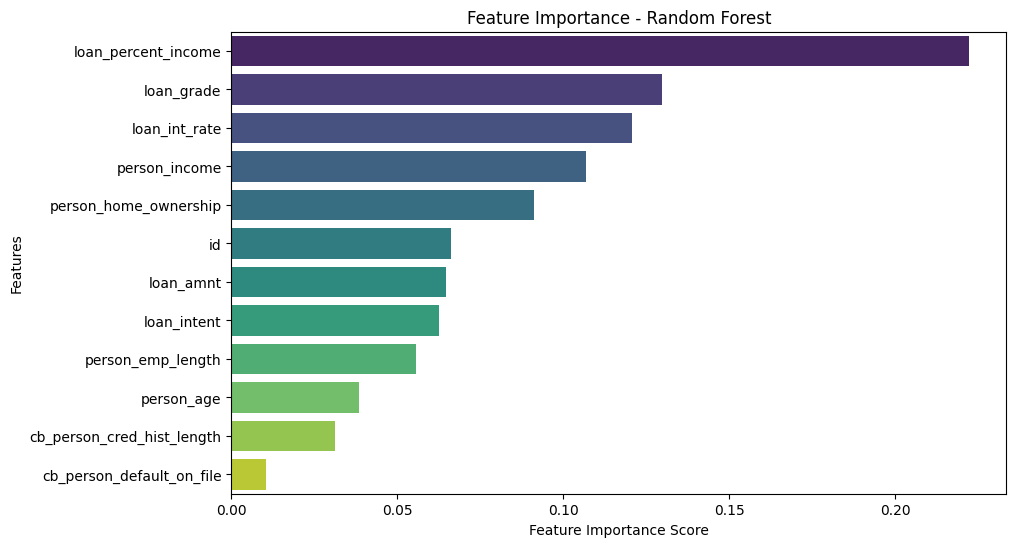

In [ ]:
# Feature Importance for Random Forest
rf = models["Random Forest"]
feature_importances = pd.Series(rf.feature_importances_, index=train_df.drop(columns=['loan_status']).columns)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Random Forest")
plt.show()

# 2nd Attempt using

In [46]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.2 MB/s eta 0:00:00


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import joblib
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression and KNN models
lr_model = LogisticRegression(max_iter = 2000, random_state=42) # Initializing the model
knn_model = KNeighborsClassifier(n_neighbors=5) # Initializing the model

# 2nd classifiers
models = {
    #"SVM": SVC(probability=True, kernel='rbf', C=1),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=500),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    #"K-Means Clustering": KMeans(n_clusters=2, random_state=42),
    "Naïve Bayes": GaussianNB(),
    #"Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss'),
    "CatBoost": CatBoostClassifier(iterations=100, verbose=0),
    "LightGBM": LGBMClassifier(n_estimators=100),
    "Logistic Regression": lr_model,
    "KNN": knn_model,
}

In [48]:
# prompt: train classifier using a def function

def train_classifier(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

  # Predict probabilities for X_test
    y_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    ruc_score = roc_auc_score(y_test, y_proba)

    #print(f"Accuracy: {accuracy}")

    # Return the trained model
    return accuracy, precision, ruc_score


In [49]:
from joblib import Parallel, delayed
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Evaluate and print results
#results = []
accuracy_scores = []
precision_scores = []
ruc_scores = []

for name, model in models.items():

    #metrics = train_classifier(model, X_train, y_train, X_test, y_test)
    current_accuracy, current_precision, current_ruc_auc_score = train_classifier(model, X_train,y_train,X_test,y_test)

    print("-" * 50)
    print("Model:", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    print("RUC_AUC_SCORE - ", current_ruc_auc_score)
    print("-" * 50)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    ruc_scores.append(current_ruc_auc_score)
    #results.append((name, metrics))  # Store results for further analysis

--------------------------------------------------
Model: Neural Network
Accuracy -  0.8795293716429363
Precision -  0.6917922948073701
RUC_AUC_SCORE -  0.785372194912785
--------------------------------------------------
--------------------------------------------------
Model: Decision Tree
Accuracy -  0.9399778327223122
Precision -  0.933456561922366
RUC_AUC_SCORE -  0.9149404444427272
--------------------------------------------------
--------------------------------------------------
Model: Random Forest
Accuracy -  0.9491857788387756
Precision -  0.9170653907496013
RUC_AUC_SCORE -  0.9367474651409715
--------------------------------------------------
--------------------------------------------------
Model: Naïve Bayes
Accuracy -  0.8820018756927275
Precision -  0.6091370558375635
RUC_AUC_SCORE -  0.8420549381163416
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:17:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--------------------------------------------------
Model: XGBoost
Accuracy -  0.9525961292522807
Precision -  0.8986784140969163
RUC_AUC_SCORE -  0.9544392530417765
--------------------------------------------------
--------------------------------------------------
Model: CatBoost
Accuracy -  0.9537044931366698
Precision -  0.9159727479182438
RUC_AUC_SCORE -  0.9540096169416212
--------------------------------------------------
[LightGBM] [Info] Number of positive: 6708, number of negative: 40208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1095
[LightGBM] [Info] Number of data points in the train set: 46916, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142979 -> initscore=-1.790765
[LightGBM] [Info] Start training from score -1.790765
----------

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--------------------------------------------------
Model: Logistic Regression
Accuracy -  0.8939381021399949
Precision -  0.7271689497716894
RUC_AUC_SCORE -  0.8696145000131016
--------------------------------------------------
--------------------------------------------------
Model: KNN
Accuracy -  0.8758632449484185
Precision -  0.5966735966735967
RUC_AUC_SCORE -  0.7577425665890674
--------------------------------------------------


In [50]:
performance_df = pd.DataFrame({'ALGORITHM':models.keys(),'ACCURACY':accuracy_scores,'PRECISION':precision_scores, 'RUC_AUC_SCORE': ruc_scores}).sort_values('RUC_AUC_SCORE',ascending=False)
performance_df.head()

,ALGORITHM,ACCURACY,PRECISION,RUC_AUC_SCORE
6,LightGBM,0.952511,0.913806,0.957989
4,XGBoost,0.952596,0.898678,0.954439
5,CatBoost,0.953704,0.915973,0.954010
2,Random Forest,0.949186,0.917065,0.936747
1,Decision Tree,0.939978,0.933457,0.914940


<ipython-input-51-6ffa9ed11eb5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ALGORITHM', y='RUC_AUC_SCORE', data=performance_df, palette="viridis")


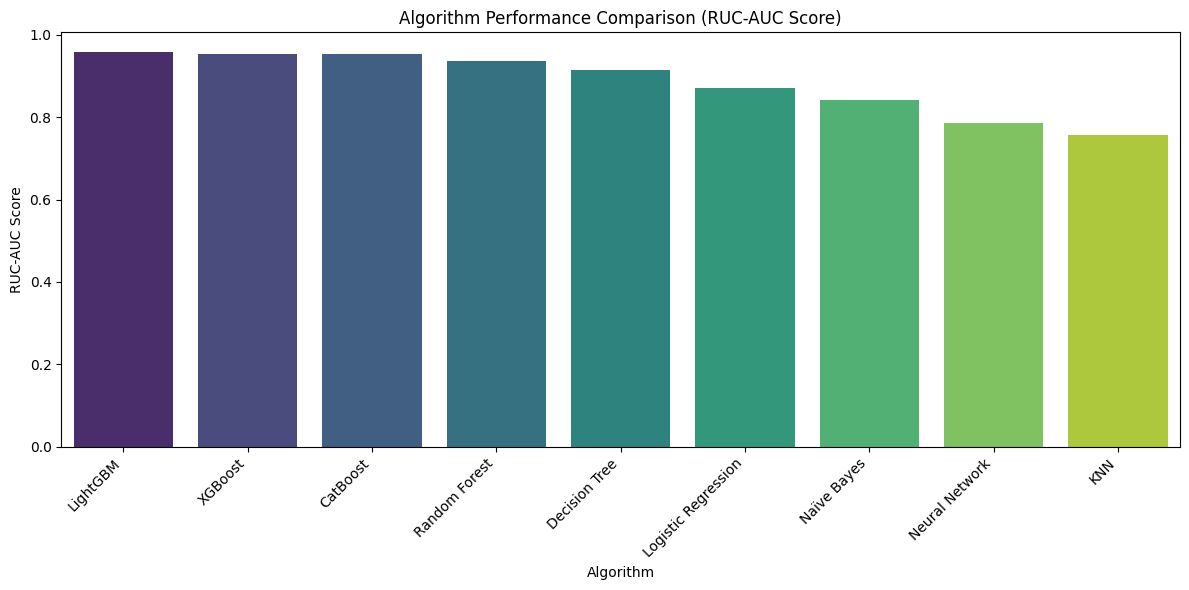

In [51]:
# prompt: show the distribution in plot graph

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'performance_df' is your DataFrame with 'ALGORITHM', 'ACCURACY', 'PRECISION', and 'RUC_AUC_SCORE' columns

plt.figure(figsize=(12, 6))
sns.barplot(x='ALGORITHM', y='RUC_AUC_SCORE', data=performance_df, palette="viridis")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title('Algorithm Performance Comparison (RUC-AUC Score)')
plt.xlabel('Algorithm')
plt.ylabel('RUC-AUC Score')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [52]:
performance_df1 = pd.melt(performance_df, id_vars = "ALGORITHM")
performance_df1

,ALGORITHM,variable,value
0,LightGBM,ACCURACY,0.952511
1,XGBoost,ACCURACY,0.952596
2,CatBoost,ACCURACY,0.953704
3,Random Forest,ACCURACY,0.949186
4,Decision Tree,ACCURACY,0.939978
5,Logistic Regression,ACCURACY,0.893938
6,Naïve Bayes,ACCURACY,0.882002
7,Neural Network,ACCURACY,0.879529
8,KNN,ACCURACY,0.875863
9,LightGBM,PRECISION,0.913806


In [53]:
# prompt: df_results = pd.DataFrame( add accuracy, precision and ruc_auc score value

df_results = performance_df.copy()


In [54]:
print(df_results)

             ALGORITHM  ACCURACY  PRECISION  RUC_AUC_SCORE
6             LightGBM  0.952511   0.913806       0.957989
4              XGBoost  0.952596   0.898678       0.954439
5             CatBoost  0.953704   0.915973       0.954010
2        Random Forest  0.949186   0.917065       0.936747
1        Decision Tree  0.939978   0.933457       0.914940
7  Logistic Regression  0.893938   0.727169       0.869615
3          Naïve Bayes  0.882002   0.609137       0.842055
0       Neural Network  0.879529   0.691792       0.785372
8                  KNN  0.875863   0.596674       0.757743


<Figure size 1200x600 with 0 Axes>

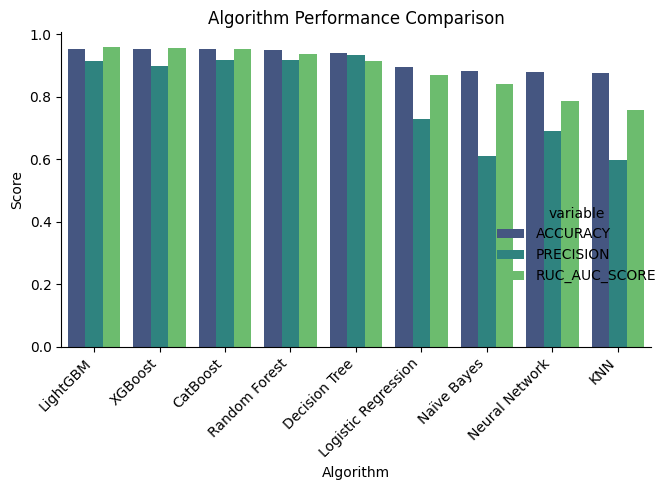

In [55]:
# prompt: write a catplot to show accuracy, precision, ruc_AUC score in each model

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'performance_df' is your DataFrame with 'ALGORITHM', 'ACCURACY', 'PRECISION', and 'RUC_AUC_SCORE' columns

plt.figure(figsize=(12, 6))
sns.catplot(x='ALGORITHM', y='value', hue='variable', data=performance_df1, kind='bar', palette="viridis")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title('Algorithm Performance Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [56]:
best_model_selection = (df_results.sort_values(by="RUC_AUC_SCORE", ascending=False)).iloc[0]["ALGORITHM"]
print(f"Best Model Selected: {best_model_selection}")

Best Model Selected: LightGBM


In [57]:
import joblib
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier

joblib.dump(best_model_selection, f"{best_model_selection}_best_model.pkl")

['LightGBM_best_model.pkl']

In [58]:
# Get predicted probabilities for the positive class (class 1)

# Assuming 'models' dictionary contains your trained models
# and X_test contains your test data features

# Get predicted probabilities for the positive class (class 1)
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        print(f"Predicted probabilities for {name}:")
        print(y_proba)
    else:
        print(f"{name} does not have predict_proba method.")


Predicted probabilities for Neural Network:
[0.14381828 0.00502928 0.3592304  ... 0.11878754 0.15869813 0.07813321]
Predicted probabilities for Decision Tree:
[0.03384649 0.01209555 0.03916045 ... 0.08249573 0.03384649 0.03916045]
Predicted probabilities for Random Forest:
[0.01 0.01 0.15 ... 0.07 0.04 0.05]
Predicted probabilities for Naïve Bayes:
[0.07015799 0.0125903  0.48257983 ... 0.17777749 0.0879237  0.22603052]
Predicted probabilities for XGBoost:
[0.02739283 0.00347439 0.3173443  ... 0.03220581 0.01581409 0.03346293]
Predicted probabilities for CatBoost:
[0.02880911 0.00603466 0.21846779 ... 0.0416346  0.02097431 0.0156713 ]
Predicted probabilities for LightGBM:
[0.02064734 0.00792596 0.2947566  ... 0.03290322 0.02086477 0.01729029]
Predicted probabilities for Logistic Regression:
[0.05914343 0.00468238 0.23253433 ... 0.09293917 0.14483509 0.12203738]
Predicted probabilities for KNN:
[0.  0.  0.2 ... 0.  0.2 0. ]


In [59]:
# prompt: predict the lightGBM with test_df

import joblib
import pandas as pd
from lightgbm import LGBMClassifier

# Load the best model
best_model_selection = joblib.load('LightGBM_best_model.pkl')

# Load your test data (replace 'test_encoded.csv' with your actual file name if needed)
test_df = pd.read_csv('test_encoded.csv')

# Assuming 'features' contains the columns used for training the model
# Use the columns used during training for prediction
features = features.columns # Use feature.columns to make the predictions.

# Assuming 'models' dictionary is available in your notebook
# containing all models that were trained in the previous steps.
loaded_model = models.get(best_model_selection)

#If the best model was LightGBM
if isinstance(loaded_model, LGBMClassifier):
    # Predict using the loaded model
    predictions = loaded_model.predict(test_df[features]) #only use the columns used for training
    print(predictions)
else:
    print("The best model selected is not LightGBM.")
    # Perform prediction using other model if not LGBM, or handle the case as needed.

[1 0 0 ... 0 0 1]


In [60]:
# prompt: same as predict the proba for lightGbm

# Assuming 'models' dictionary is available and contains the trained LightGBM model
# and X_test contains your test data features

# Access the LightGBM model from the 'models' dictionary
lgbm_model = models.get("LightGBM")

if lgbm_model:
    # Predict probabilities for the positive class (class 1)
    y_proba = lgbm_model.predict_proba(X_test)[:, 1]
    print(f"Predicted probabilities for LightGBM:\n{y_proba}")
else:
    print("LightGBM model not found in the 'models' dictionary.")


Predicted probabilities for LightGBM:
[0.02064734 0.00792596 0.2947566  ... 0.03290322 0.02086477 0.01729029]


In [61]:
# prompt: with predicted lightGBM test_df create a submission.csv and save the pd.dataframe

import pandas as pd

# Assuming 'predictions' contains your model's predictions for the test set
# and 'test_df' is your original test DataFrame with an 'id' column

# Create a submission DataFrame
submission_df = pd.DataFrame({'id': test_df['id'], 'loan_status': predictions})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)
submission_df

,id,loan_status
0,58645,1
1,58646,0
2,58647,0
3,58648,0
4,58649,0
...,...,...
39093,97738,0
39094,97739,0
39095,97740,0
39096,97741,0


# attempt


In [ ]:
from joblib import Parallel, delayed
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Evaluate and print results
results = []
for name, model in models.items():
    print("-" * 50)
    print(f"Model:", name)

    metrics = train_classifier(model, X_train, y_train, X_test, y_test)

    print(f"Accuracy:", metrics["accuracy"])
    print(f"Precision:", metrics["precision"])
    print(f"Recall:", metrics["recall"])
    print(f"F1 Score:", metrics["f1"])
    if not np.isnan(metrics["roc_auc"]):
        print(f"ROC AUC Score:", metrics["roc_auc"])
    print(f"Cross-Validation Mean Accuracy:", metrics["cv_mean_accuracy"])
    print("-" * 50)
    results.append((name, metrics))  # Store results for further analysis

--------------------------------------------------
Model: SVM


# cross validation

In [ ]:
# Split into training and testing sets (80-20)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define a function to train, predict, and evaluate a classifier
def train_and_evaluate(clf, X_train, y_train, X_test, y_test, cv):
    """
    Trains a classifier, makes predictions, and evaluates its performance.

    Args:
        clf: The classifier object (e.g., RandomForestClassifier).
        X_train: Training data features.
        y_train: Training data target.
        X_test: Testing data features.
        y_test: Testing data target.

    Returns:
        A dictionary containing the accuracy, precision, recall, F1-score, and ROC AUC score.
    """

    # Cross-validation with stratification
    scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy')
    cv_mean_accuracy = scores.mean()

    # Fit the model
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

     # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)  # Handle zero-division cases
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate ROC AUC if the model supports predict_proba
    if hasattr(clf, "predict_proba"):
        y_proba = clf.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        roc_auc = np.nan  # Set to NaN if predict_proba is not available

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": roc_auc,
        "cv_mean_accuracy": cv_mean_accuracy
    }


In [ ]:
pip install --upgrade scikit-learn

In [ ]:

from joblib import Parallel, delayed
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Evaluate and print results
results = []
for name, model in models.items():
    print("-" * 50)
    print(f"Model:", name)

    metrics = train_and_evaluate(model, X_train, y_train, X_test, y_test, cv)

    print(f"Accuracy:", metrics["accuracy"])
    print(f"Precision:", metrics["precision"])
    print(f"Recall:", metrics["recall"])
    print(f"F1 Score:", metrics["f1"])
    if not np.isnan(metrics["roc_auc"]):
        print(f"ROC AUC Score:", metrics["roc_auc"])
    print(f"Cross-Validation Mean Accuracy:", metrics["cv_mean_accuracy"])
    print("-" * 50)
    results.append((name, metrics))  # Store results for further analysis

--------------------------------------------------
Model: SVM


In [ ]:
# prompt: use train_and_evaluat def function and make loop to print accuracy, precision, recall, f1, roc_auc, cv_mean_accuracy in each models

from joblib import Parallel, delayed
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

import warnings

# Suppress warnings globally
warnings.filterwarnings("ignore")
# Suppress warnings from specific libraries
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)



# Assuming X, y, X_train, X_test, y_train, y_test, and cv are already defined as in your provided code

# Loop through each model and print the evaluation metrics
# Evaluate and print results
results = []
accuracy_scores = []
precision_scores = []
roc_auc_scores = []
recall_scores = []
f1_scores = []
cv_mean_accuracy_scores = []


for name, model in models.items():
    try:
        evaluation_results = train_and_evaluate(model, X_train, y_train, X_test, y_test, cv)

        # Store individual metric scores
        accuracy_scores.append((name, evaluation_results["accuracy"]))
        precision_scores.append((name, evaluation_results["precision"]))
        recall_scores.append((name, evaluation_results["recall"]))
        f1_scores.append((name, evaluation_results["f1"]))
        roc_auc_scores.append((name, evaluation_results["roc_auc"]))
        cv_mean_accuracy_scores.append((name, evaluation_results["cv_mean_accuracy"]))

        # Append overall results
        results.append((name, evaluation_results))

        # Print results
        print("-" * 50)
        print(f"Model: {name}")
        print(f"Accuracy: {evaluation_results['accuracy']:.4f}")
        print(f"Precision: {evaluation_results['precision']:.4f}")
        print(f"Recall: {evaluation_results['recall']:.4f}")
        print(f"F1-score: {evaluation_results['f1']:.4f}")
        if not np.isnan(evaluation_results['roc_auc']):
          print(f"ROC AUC: {evaluation_results['roc_auc']:.4f}")
        print(f"Cross-Validation Mean Accuracy: {evaluation_results['cv_mean_accuracy']:.4f}")
        print("-" * 50)

    except Exception as e:
        print(f"Error evaluating {name}: {e}")



--------------------------------------------------
Model: SVM
Accuracy: 0.8576
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC AUC: 0.7120
Cross-Validation Mean Accuracy: 0.8576
--------------------------------------------------
--------------------------------------------------
Model: Neural Network
Accuracy: 0.8915
Precision: 0.7344
Recall: 0.3725
F1-score: 0.4942
ROC AUC: 0.8656
Cross-Validation Mean Accuracy: 0.8812
--------------------------------------------------
--------------------------------------------------
Model: Decision Tree
Accuracy: 0.9407
Precision: 0.9460
Recall: 0.6192
F1-score: 0.7485
ROC AUC: 0.9103
Cross-Validation Mean Accuracy: 0.9388
--------------------------------------------------
--------------------------------------------------
Model: Random Forest
Accuracy: 0.9485
Precision: 0.9333
Recall: 0.6874
F1-score: 0.7917
ROC AUC: 0.9304
Cross-Validation Mean Accuracy: 0.9480
--------------------------------------------------
-----------------------------

In [ ]:
import pandas as pd
import joblib
import numpy as np

df_results = pd.DataFrame({
    "Model": [name for name, _ in accuracy_scores],
    "Accuracy": [score for _, score in accuracy_scores],
    "Precision": [score for _, score in precision_scores],
    "Recall": [score for _, score in recall_scores],
    "F1 Score": [score for _, score in f1_scores],
    "ROC AUC": [score for _, score in roc_auc_scores],
    "CV Mean Accuracy": [score for _, score in cv_mean_accuracy_scores],
})

# Display results sorted by Accuracy
df_results.sort_values(by="Accuracy", ascending=False)


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,CV Mean Accuracy
9,LightGBM,0.951999,0.924789,0.721557,0.810629,0.956421,0.952511
8,CatBoost,0.951488,0.925097,0.717365,0.808094,0.953733,0.951957
7,XGBoost,0.950209,0.902819,0.728743,0.806494,0.951297,0.950593
3,Random Forest,0.948504,0.933333,0.687425,0.791724,0.930354,0.947971
6,Gradient Boosting,0.945434,0.908082,0.686228,0.781719,0.941545,0.945946
2,Decision Tree,0.940745,0.946020,0.619162,0.748462,0.910296,0.938784
10,Logistic Regression,0.894364,0.739179,0.398802,0.518086,0.870868,0.891295
1,Neural Network,0.891466,0.734357,0.372455,0.494239,0.865585,0.881171
5,Naïve Bayes,0.883195,0.621163,0.460479,0.528886,0.841740,0.880702
11,KNN,0.876631,0.624027,0.335928,0.436746,0.765184,0.876652


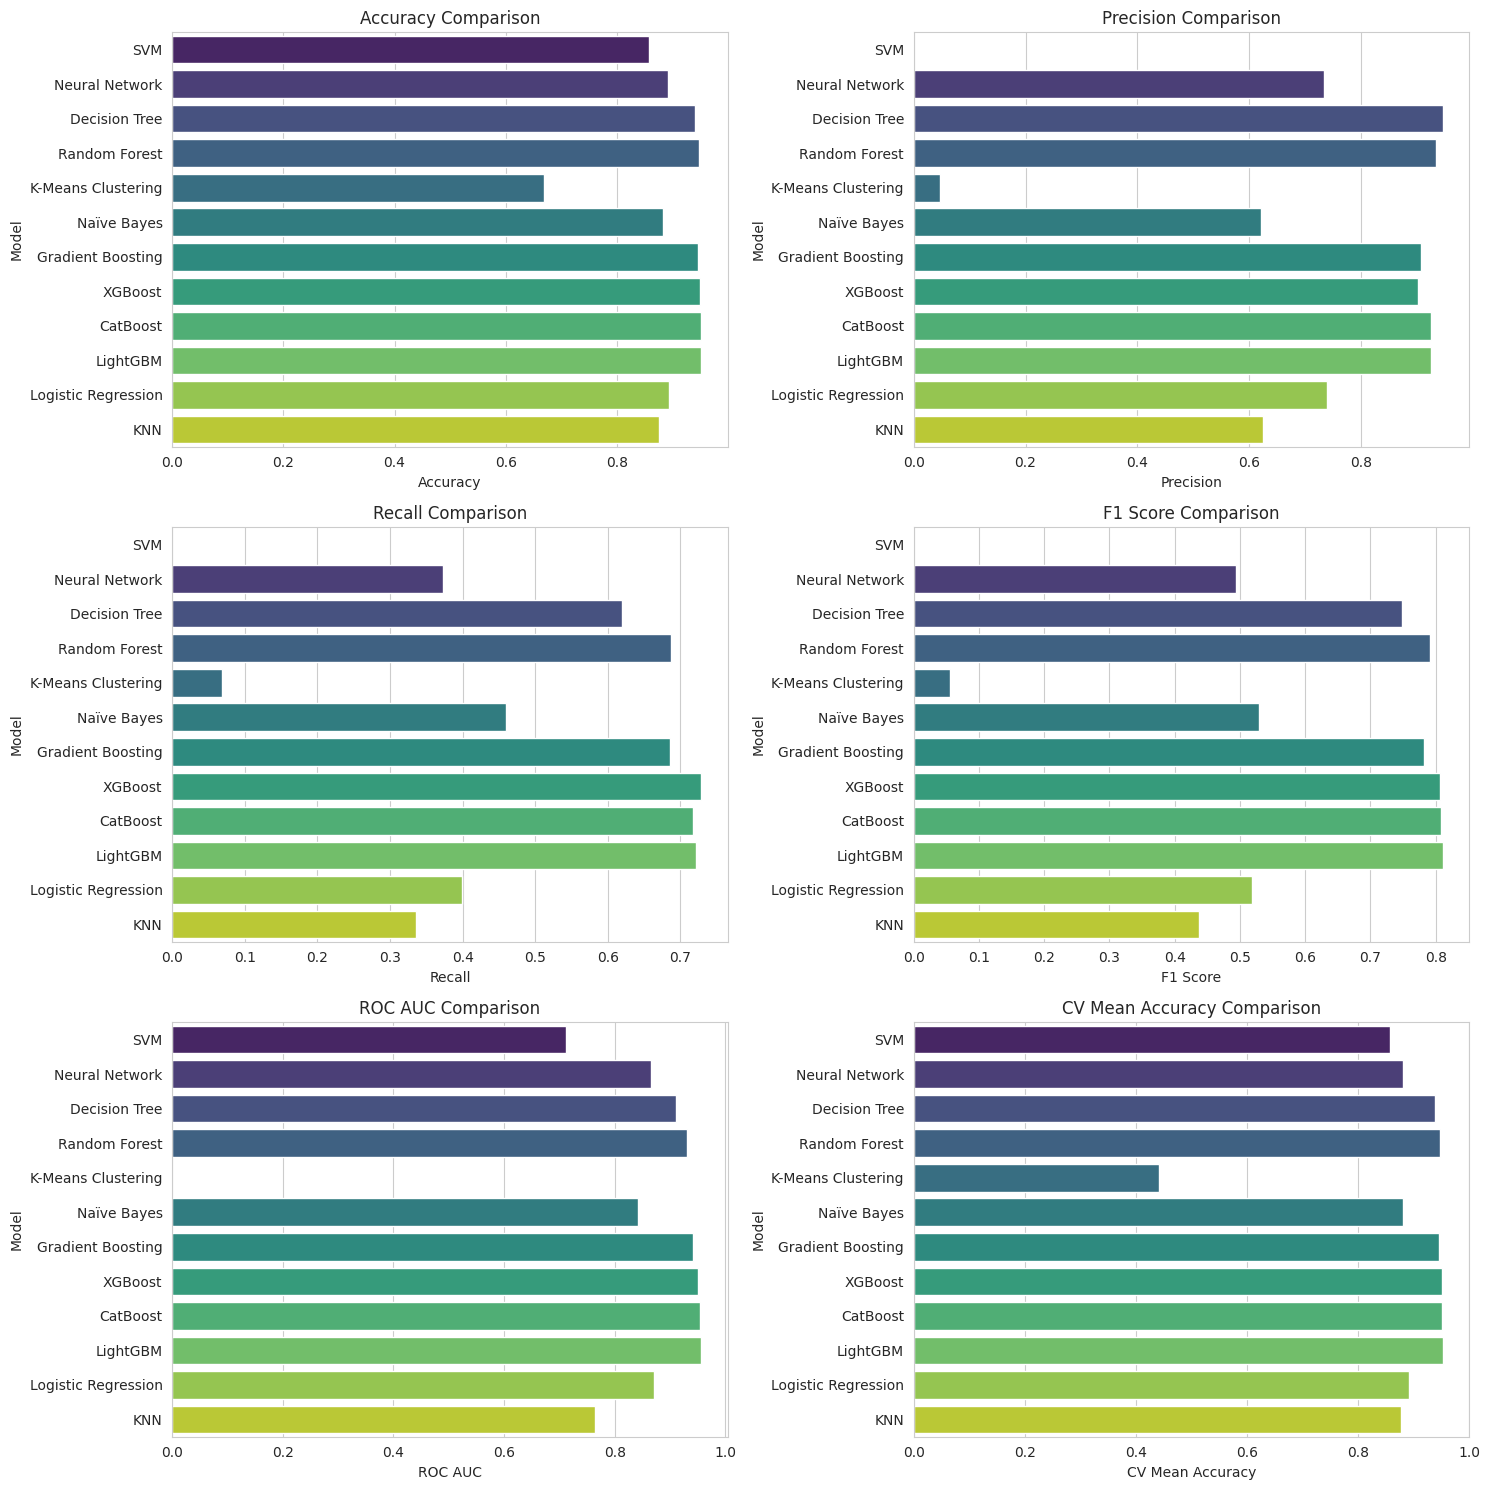

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Use a valid Seaborn color palette
palette = sns.color_palette("viridis", len(df_results))  # 'viridis' is a valid palette

# Plot all metrics
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC", "CV Mean Accuracy"]

for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]
    sns.barplot(x=metric, y="Model", data=df_results, ax=ax, palette=palette)
    ax.set_title(f"{metric} Comparison")
    ax.set_xlabel(metric)
    ax.set_ylabel("Model")

plt.tight_layout()
plt.show()

                  Model            Metric     Score
0                   SVM          Accuracy  0.857618
1        Neural Network          Accuracy  0.891466
2         Decision Tree          Accuracy  0.940745
3         Random Forest          Accuracy  0.948504
4    K-Means Clustering          Accuracy  0.669622
..                  ...               ...       ...
67              XGBoost  CV Mean Accuracy  0.950593
68             CatBoost  CV Mean Accuracy  0.951957
69             LightGBM  CV Mean Accuracy  0.952511
70  Logistic Regression  CV Mean Accuracy  0.891295
71                  KNN  CV Mean Accuracy  0.876652

[72 rows x 3 columns]


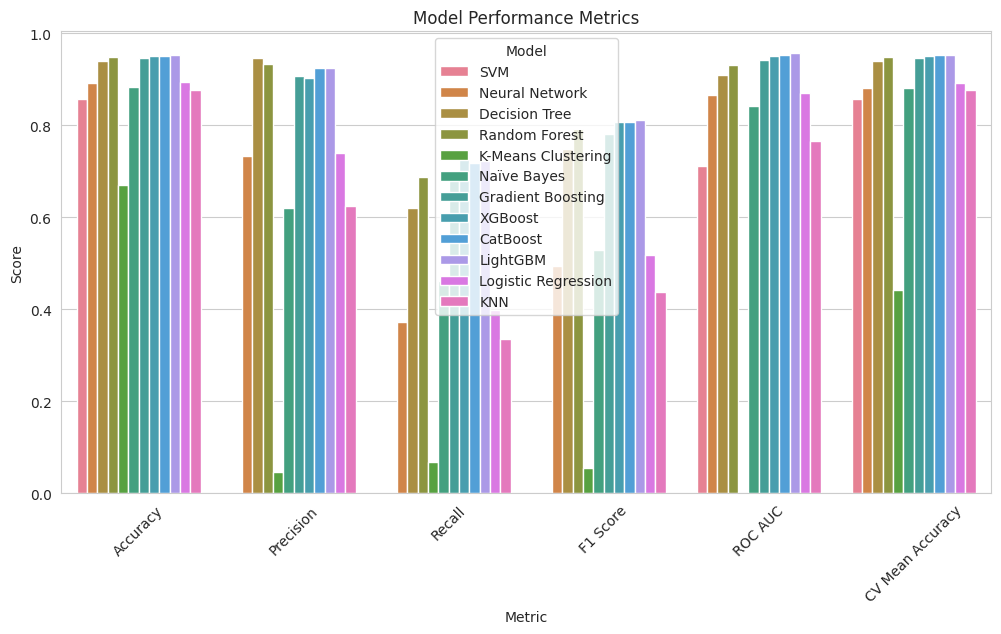

In [ ]:
# prompt: pd.melt

# Assuming 'df_results' DataFrame is already created as in your provided code.

# Melt the DataFrame to long format
melted_df = pd.melt(df_results, id_vars="Model", var_name="Metric", value_name="Score")

print(melted_df)

# Plotting using the melted DataFrame
plt.figure(figsize=(12, 6))
sns.barplot(x="Metric", y="Score", hue="Model", data=melted_df)
plt.xticks(rotation=45)
plt.title("Model Performance Metrics")
plt.show()


In [ ]:
best_model_selection = (df_results.sort_values(by="Accuracy", ascending=False)).iloc[0]["Model"]
print(f"Best Model Selected: {best_model_selection}")

Best Model Selected: LightGBM


In [ ]:
best_model_selection = (df_results.sort_values(by="Accuracy", ascending=False)).iloc[2]["Model"]
print(f"Best Model Selected: {best_model_selection}")

Best Model Selected: XGBoost


# Trying catboost

In [ ]:
# Assuming df_results is defined.
best_model_selection = (df_results.sort_values(by="Accuracy", ascending=False)).iloc[0]["Model"]
print(f"Best Model Selected: {best_model_selection}")

# Get the actual model object from the 'models' dictionary
best_model = models[best_model_selection] # Get the best model object using its name
print(f"The type of the best_model is {type(best_model)} ") #check the type

#best_model.fit(X_train, y_train)

Best Model Selected: LightGBM
The type of the best_model is <class 'lightgbm.sklearn.LGBMClassifier'> 


In [ ]:

model_filename = f"best_model_{best_model_selection}.pkl"
joblib.dump(best_model, model_filename)
print(f" Model saved as: {model_filename}")


 Model saved as: best_model_LightGBM.pkl


In [ ]:
# Get predicted probabilities for the positive class (class 1)
sample_probs = loaded_model.predict_proba(sample_input)[:, 1]

# Adjust the threshold (e.g., 0.3 instead of 0.5)
threshold = 0.3
sample_predictions = (sample_probs >= threshold).astype(int)

print("Sample Predictions with Adjusted Threshold:")
for i, pred in enumerate(sample_predictions, 1):
    print(f"Sample {i}: Predicted Class -> {pred}")



Sample Predictions with Adjusted Threshold:
Sample 1: Predicted Class -> 1
Sample 2: Predicted Class -> 0
Sample 3: Predicted Class -> 0
Sample 4: Predicted Class -> 0
Sample 5: Predicted Class -> 0


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_recall_curve, classification_report
import numpy as np

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the best model with resampled data
best_model = LGBMClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
best_model.fit(X_train_resampled, y_train_resampled)

# Get predicted probabilities for the test set
y_probs = best_model.predict_proba(X_test)[:, 1]

# Find the optimal threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

# Use the best threshold for predictions
y_pred = (y_probs >= best_threshold).astype(int)

# Print classification report
print("Classification Report with Optimal Threshold:")
print(classification_report(y_test, y_pred))

# Test with sample input
sample_input = X_test.iloc[:5]  # First 5 test samples
sample_probs = best_model.predict_proba(sample_input)[:, 1]
sample_predictions = (sample_probs >= best_threshold).astype(int)

print("\nSample Predictions with Optimal Threshold:")
for i, pred in enumerate(sample_predictions, 1):
    print(f"Sample {i}: Predicted Class -> {pred}")

[LightGBM] [Info] Number of positive: 40236, number of negative: 40236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1630
[LightGBM] [Info] Number of data points in the train set: 80472, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10059
           1       0.91      0.71      0.80      1670

    accuracy                           0.95     11729
   macro avg       0.93      0.85      0.88     11729
weighted avg       0.95      0.95      0.95     11729


Sample Predictions with Optimal Threshold:
Sample 1: Predicted Class -> 0
Sample 2: Predicted Class -> 0
Sample 3: Predicte

# **LightGBM imbalance issue**

In [ ]:
# Assuming df_results is defined.
best_model_selection = (df_results.sort_values(by="Accuracy", ascending=False)).iloc[0]["Model"]
print(f"Best Model Selected: {best_model_selection}")

# Get the actual model object from the 'models' dictionary
best_model = models[best_model_selection] # Get the best model object using its name
print(f"The type of the best_model is {type(best_model)} ") #check the type

best_model.fit(X_train, y_train)  # Now this should work correctly

Best Model Selected: LightGBM
The type of the best_model is <class 'lightgbm.sklearn.LGBMClassifier'> 
[LightGBM] [Info] Number of positive: 6680, number of negative: 40236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005665 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 46916, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142382 -> initscore=-1.795644
[LightGBM] [Info] Start training from score -1.795644


LGBMClassifier()

In [ ]:

model_filename = f"best_model_{best_model_selection}.pkl"
joblib.dump(best_model, model_filename)
print(f" Model saved as: {model_filename}")


 Model saved as: best_model_LightGBM.pkl


In [ ]:
best_model = LGBMClassifier(n_estimators=100, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))

In [ ]:
# Get predicted probabilities for the positive class (class 1)
sample_probs = loaded_model.predict_proba(sample_input)[:, 1]

# Adjust the threshold (e.g., 0.3 instead of 0.5)
threshold = 0.3
sample_predictions = (sample_probs >= threshold).astype(int)

print("Sample Predictions with Adjusted Threshold:")
for i, pred in enumerate(sample_predictions, 1):
    print(f"Sample {i}: Predicted Class -> {pred}")



Sample Predictions with Adjusted Threshold:
Sample 1: Predicted Class -> 0
Sample 2: Predicted Class -> 0
Sample 3: Predicted Class -> 0
Sample 4: Predicted Class -> 0
Sample 5: Predicted Class -> 0


In [ ]:
import joblib
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier

# Save the best model (LightGBM)
best_model = LGBMClassifier(n_estimators=100, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
best_model.fit(X_train, y_train)
joblib.dump(best_model, "best_model.pkl")

# Load the model
loaded_model = joblib.load("best_model.pkl")

# Test with sample input
sample_input = X_test.iloc[:5]  # First 5 test samples

# Get predicted probabilities for the positive class (class 1)
sample_probs = loaded_model.predict_proba(sample_input)[:, 1]

# Adjust the threshold (e.g., 0.3 instead of 0.5)
threshold = 0.3
sample_predictions = (sample_probs >= threshold).astype(int)

print("Sample Predictions with Adjusted Threshold:")
for i, pred in enumerate(sample_predictions, 1):
    print(f"Sample {i}: Predicted Class -> {pred}")

# Re-evaluate the model on the test set
y_pred = (loaded_model.predict_proba(X_test)[:, 1] >= threshold).astype(int)
print("\nClassification Report with Adjusted Threshold:")
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 6680, number of negative: 40236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005679 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 46916, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142382 -> initscore=-1.795644
[LightGBM] [Info] Start training from score -1.795644
Sample Predictions with Adjusted Threshold:
Sample 1: Predicted Class -> 0
Sample 2: Predicted Class -> 0
Sample 3: Predicted Class -> 0
Sample 4: Predicted Class -> 0
Sample 5: Predicted Class -> 0

Classification Report with Adjusted Threshold:
              precision    recall  f1-score   support

           0       0.98      0.84      0.91     10059
           1       0.49      0.91      0.64      1670

    accuracy                    

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_recall_curve, classification_report
import numpy as np

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the best model with resampled data
best_model = LGBMClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
best_model.fit(X_train_resampled, y_train_resampled)

# Get predicted probabilities for the test set
y_probs = best_model.predict_proba(X_test)[:, 1]

# Find the optimal threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

# Use the best threshold for predictions
y_pred = (y_probs >= best_threshold).astype(int)

# Print classification report
print("Classification Report with Optimal Threshold:")
print(classification_report(y_test, y_pred))

# Test with sample input
sample_input = X_test.iloc[:5]  # First 5 test samples
sample_probs = best_model.predict_proba(sample_input)[:, 1]
sample_predictions = (sample_probs >= best_threshold).astype(int)

print("\nSample Predictions with Optimal Threshold:")
for i, pred in enumerate(sample_predictions, 1):
    print(f"Sample {i}: Predicted Class -> {pred}")

[LightGBM] [Info] Number of positive: 40236, number of negative: 40236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1630
[LightGBM] [Info] Number of data points in the train set: 80472, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10059
           1       0.91      0.71      0.80      1670

    accuracy                           0.95     11729
   macro avg       0.93      0.85      0.88     11729
weighted avg       0.95      0.95      0.95     11729


Sample Predictions with Optimal Threshold:
Sample 1: Predicted Class -> 0
Sample 2: Predicted Class -> 0
Sample 3: Predicte

# **Debuging**


📊 Sample Predictions:
Sample 1: Predicted Class -> 0
Sample 2: Predicted Class -> 0
Sample 3: Predicted Class -> 0
Sample 4: Predicted Class -> 0
Sample 5: Predicted Class -> 0


In [ ]:
import numpy as np
import pandas as pd

# Check class distribution
print("Class distribution in training set:")
print(pd.Series(y_train).value_counts(normalize=True))

Class distribution in training set:
loan_status
0    0.857618
1    0.142382
Name: proportion, dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [ ]:
train_preds = best_model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, train_preds))
print("Test Accuracy:", accuracy_score(y_test, best_model.predict(X_test)))

Training Accuracy: 0.9567311791286555
Test Accuracy: 0.9519993179299173


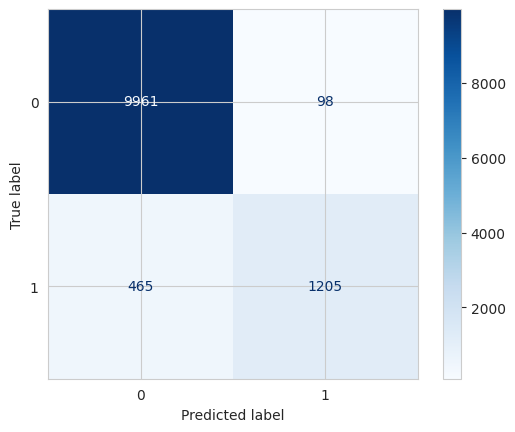

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate Confusion Matrix
cm = confusion_matrix(y_test, best_model.predict(X_test))

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10059
           1       0.92      0.72      0.81      1670

    accuracy                           0.95     11729
   macro avg       0.94      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729



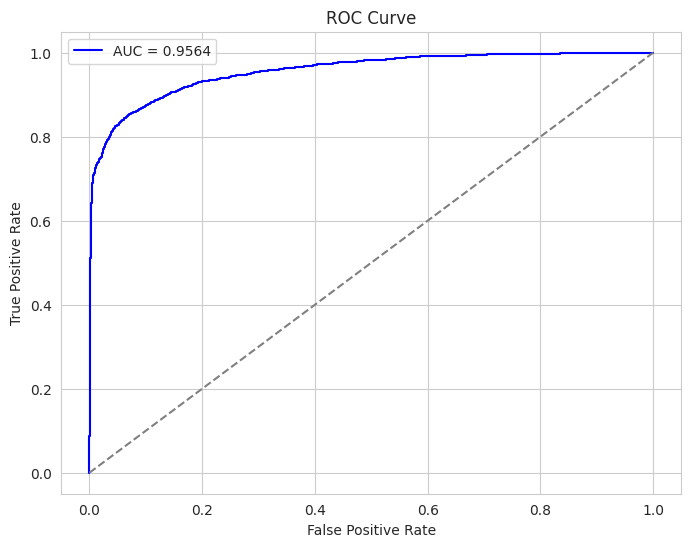

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get probability scores
y_probs = best_model.predict_proba(X_test)[:, 1]

# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
import joblib

# Save model
joblib.dump(best_model, "best_model.pkl")

# Load model
loaded_model = joblib.load("best_model.pkl")

# Test with sample input
sample_input = X_test.iloc[:5]  # First 5 test samples
sample_predictions = loaded_model.predict(sample_input)

print("Sample Predictions:")
for i, pred in enumerate(sample_predictions, 1):
    print(f"Sample {i}: Predicted Class -> {pred}")

Sample Predictions:
Sample 1: Predicted Class -> 0
Sample 2: Predicted Class -> 0
Sample 3: Predicted Class -> 0
Sample 4: Predicted Class -> 0
Sample 5: Predicted Class -> 0


In [ ]:
import numpy as np  # Ensure numpy is imported

# Get the prediction probabilities for the first 5 test samples
probs = best_model.predict_proba(X_test[:5])

# Print sample predictions
for i, prob in enumerate(probs):
    print(f"Sample {i+1}: Probabilities -> {prob}, Predicted Class -> {np.argmax(prob)}")


Sample 1: Probabilities -> [0.92482139 0.07517861], Predicted Class -> 0
Sample 2: Probabilities -> [0.9899157 0.0100843], Predicted Class -> 0
Sample 3: Probabilities -> [0.98146519 0.01853481], Predicted Class -> 0
Sample 4: Probabilities -> [0.94399604 0.05600396], Predicted Class -> 0
Sample 5: Probabilities -> [0.98634966 0.01365034], Predicted Class -> 0


In [ ]:
print(y_train.value_counts(normalize=True))

loan_status
0    0.857618
1    0.142382
Name: proportion, dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

NameError: name 'y_pred' is not defined

In [ ]:
# prompt: y_predict

# Assuming 'best_model' is already defined and trained as in your previous code.
# Also assuming X_test is defined and contains the features for the test set.


y_predict = best_model.predict(X_test)
y_predict


array([0, 0, 0, ..., 0, 0, 0])

# **Low acccuracy section**

In [ ]:
# Split into training and testing sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Train, predict, and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")

    # Cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

    # Fit model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else np.zeros(len(y_test))

   # Calculate metrics with `zero_division=0` to prevent warnings
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    recall = recall_score(y_test, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)

    # Print performance
    print("=" * 50)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"{name} Cross-Validation Mean Accuracy: {scores.mean():.4f}")
    print("-" * 50)
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Training Neural Network...
Neural Network Accuracy: 0.9027
Neural Network Cross-Validation Mean Accuracy: 0.8337
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     10059
           1       0.73      0.50      0.59      1670

    accuracy                           0.90     11729
   macro avg       0.83      0.73      0.77     11729
weighted avg       0.89      0.90      0.89     11729

--------------------------------------------------
Training Decision Tree...
Decision Tree Accuracy: 0.9407
Decision Tree Cross-Validation Mean Accuracy: 0.9394
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     10059
           1       0.95      0.62      0.75      1670

    accuracy                           0.94     11729
   macro avg       0.94      0.81      0.86     11729
weighted avg       0.94  

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:26:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:26:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:26:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:26:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:26:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost Accuracy: 0.9502
XGBoost Cross-Validation Mean Accuracy: 0.9504
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10059
           1       0.90      0.73      0.81      1670

    accuracy                           0.95     11729
   macro avg       0.93      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729

--------------------------------------------------
Training CatBoost...
CatBoost Accuracy: 0.9515
CatBoost Cross-Validation Mean Accuracy: 0.9522
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10059
           1       0.93      0.72      0.81      1670

    accuracy                           0.95     11729
   macro avg       0.94      0.85      0.89     11729
weighted avg       0.95      0.95      0.95     11729

--------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Accuracy: 0.8944
Logistic Regression Cross-Validation Mean Accuracy: 0.8920
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10059
           1       0.74      0.40      0.52      1670

    accuracy                           0.89     11729
   macro avg       0.82      0.69      0.73     11729
weighted avg       0.88      0.89      0.88     11729

--------------------------------------------------
Training KNN...
KNN Accuracy: 0.8766
KNN Cross-Validation Mean Accuracy: 0.8767
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     10059
           1       0.62      0.34      0.44      1670

    accuracy                           0.88     11729
   macro avg       0.76      0.65      0.68     11729
weighted avg       0.86      0.88      0.86     11729

-----------------

In [ ]:
# prompt: choose the best model

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# ... (Your existing code)

# After training and evaluating all models, analyze the results.
# The provided code already creates a performance DataFrame (`performance_df`).
# Examine the Accuracy and ROC-AUC scores, as well as the classification reports.

# Example: Choosing the best model based on ROC-AUC
best_model_name = performance_df.loc[performance_df['ROC-AUC'].idxmax(), 'Model']
print(f"\nThe best model based on ROC-AUC is: {best_model_name}")

# Further analysis could include:
# 1. Examine the confusion matrices:  Look for models with low false positives and false negatives.
# 2. Consider the computational cost of each model. Some models (e.g., neural networks) are more resource-intensive.
# 3. Business context: What is the cost of false positives vs. false negatives?
# 4. Use a different metric if appropriate for your problem (e.g. F1-score, precision, recall).

#Example using the best model to predict on test data.
best_model = models[best_model_name]  # Get the best model based on the selected metric

# Prepare test data (same preprocessing as training data)
X_test_prepared = test_df.drop(columns = uncommon_columns, errors='ignore') # Handle potential errors

numerical_cols_test = X_test_prepared.select_dtypes(include=np.number).columns
X_test_prepared[numerical_cols_test] = scaler.transform(X_test_prepared[numerical_cols_test])
#Make prediction
predictions = best_model.predict(X_test_prepared)

# Further process the predictions as needed.
# E.g. convert numerical predictions to original labels using the LabelEncoder





The best model based on ROC-AUC is: Gradient Boosting


KeyError: 'Gradient Boosting'

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# HTML UI

In [ ]:
pip install lightgbm

In [ ]:
import joblib
import pandas as pd

# Load the saved model
model_path = "LightGBM_best_model.pkl"  # Assuming this is the correct path now
model = joblib.load(model_path)  # Load the actual model object

# Example input data
data = pd.DataFrame([{
    "person_age": 30,
    "person_income": 50000,
    "person_home_ownership": "RENT",
    "person_emp_length": 5.0,
    "loan_intent": "EDUCATION",
    "loan_grade": "B",
    "loan_amnt": 10000,
    "loan_int_rate": 10.0,
    "loan_percent_income": 0.2,
    "cb_person_default_on_file": "Y",
    "cb_person_cred_hist_length": 3
}])

# Preprocess the data (similar to how you did during training)
# Replace 'categorical_features' with your actual categorical features
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Initialize a dictionary to store the label encoders
label_encoders = {}

# Encode categorical columns for both train and test data
for col in categorical_features:
    # Load the saved LabelEncoder for each column
    label_encoder = joblib.load(f'label_encoders.pkl')[col]

    # Transform the column
    data[col] = label_encoder.transform(data[col].astype(str))


# Predict loan status (1 = Approved, 0 = Not Approved)
prediction = model.predict(data)  # Now you're using the loaded model
print("Loan Status Prediction:", prediction[0])